# Installing packages, cloning code and loading data

In [ ]:
# Install SpaCy
!pip install spacy

In [ ]:
# Install the Spacy English model
!python -m spacy download en

In [ ]:
!pip install gensim

In [ ]:
# Clone repo from github
!git clone https://github.com/urigoren/nlp_classification.git

In [ ]:
# List current folder
!pwd

In [ ]:
base_folder = '/home/dsxuser/work'
sys.path.append(base_folder + "/nlp_classification/python")

In [ ]:
# Change the python directory to the folder
import os
os.chdir(base_folder + '/nlp_classification/notebooks')

In [ ]:
# Code for downloading data from Google Drive
import requests

def download_file_from_google_drive(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    


In [ ]:
# Download data from Google Drive
download_file_from_google_drive('1CD-wyXoZ5UKJWN20kZDWvdVqcQvRCzP5', 'data.zip')

In [ ]:
# Unzip the data into the correct folder
!unzip data.zip -d ..

That's it! We should be set to go.

# Notebook 1

In [1]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path.append("../python")
import data
%matplotlib inline

Read the data
---

In [2]:
df = data.asDataFrame()
df

,file,tag
num,,
41270,bylaws-41270.txt,bylaws
8840,employment-08840.txt,employment
29480,rsu-29480.txt,rsu
1520,SPA-01520.txt,SPA
170,SPA-00170.txt,SPA
38150,rra-38150.txt,rra
13290,employment-13290.txt,employment
2840,credit-02840.txt,credit
12830,employment-12830.txt,employment


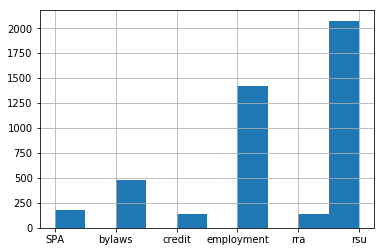

In [3]:
df.tag.hist()

In [4]:
print(data.readFile("employment-10964.txt"))

None


In [5]:
i = 0
for tag, body in data.getIterator():
    print ("="* 100)
    print (tag)
    print ("-"* 100)
    print (body[:1000])
    i+=1
    if i>=3:
        break

bylaws
----------------------------------------------------------------------------------------------------
  
  


Exhibit 3.1

  


  


  


  


  




OF

NEW PEOPLES BANKSHARES, INC.

  


(restated in electronic format as of March 17, 2004)

  


  


  
  
  


  


  


* * *

  
  


TABLE OF CONTENTS

  


  


ARTICLE 1 – SHARES 

4

  


Section 1.

Certificates 

4

Section 2.

Signatures 

4

Section 3.

Duplicate Certificates 

4

Section 4.

Transfer of Shares 

4

Section 5.

Restrictions on Transfer 

4

  


ARTICLE II – SHAREHOLDERS 

4

  


Section 1.

Holders of Shares 

4

Section 2.

Meetings Generally 

4

Section 3.

Annual Meetings 

5

Section 4.

Special Meetings 

5

Section 5.

Notice 

5

Section 6.

Determination of Shareholders of Record 

5

Section 7.

Conduct of Meetings 

5

Section 8.

Proxies 

6

Section 9.

Procedure at Meetings 

6

Section 10.

Shareholder Proposals 

6

Section 11.

Quorum and Voting 

7

Section 12.

Inspectors 

7

Secti

Preprocess
---

In [6]:
sample_doc = data.readFile("SPA-00150.txt")
print (sample_doc)

  
QuickLinks \-- Click here to rapidly navigate through this document

EXHIBIT 10.11.1 

  
WESTAFF, INC.  
  



I hereby elect to participate in the Employee Stock Purchase Plan (the "ESPP") beginning with the purchase period specified below, and I hereby subscribe to purchase shares of Common Stock of Westaff, Inc. (the "Corporation") in accordance with the provisions of this Agreement and the ESPP. I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the 1% multiple of my cash earnings (not to exceed a maximum of 10%) specified in my attached Enrollment/Change Form. 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year, and from the first business day in August each year to the last business day in January of the following year. My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my payrol

### Replacing uninformative tokens
In this example we replace all numeric tokens with a `<NUM>` token

In [7]:
digits = re.compile(r"\d[\d\.\$]*")
sample_doc = digits.sub("<NUM>", sample_doc)
print (sample_doc)

  
QuickLinks \-- Click here to rapidly navigate through this document

EXHIBIT <NUM> 

  
WESTAFF, INC.  
  



I hereby elect to participate in the Employee Stock Purchase Plan (the "ESPP") beginning with the purchase period specified below, and I hereby subscribe to purchase shares of Common Stock of Westaff, Inc. (the "Corporation") in accordance with the provisions of this Agreement and the ESPP. I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the <NUM>% multiple of my cash earnings (not to exceed a maximum of <NUM>%) specified in my attached Enrollment/Change Form. 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year, and from the first business day in August each year to the last business day in January of the following year. My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my p

### Remove punctuation and unknown charactars

In [8]:
not_allowed = re.compile(r"[^\s\w<>_]")
sample_doc = not_allowed.sub("", sample_doc)
print (sample_doc)

  
QuickLinks  Click here to rapidly navigate through this document

EXHIBIT <NUM> 

  
WESTAFF INC  
  



I hereby elect to participate in the Employee Stock Purchase Plan the ESPP beginning with the purchase period specified below and I hereby subscribe to purchase shares of Common Stock of Westaff Inc the Corporation in accordance with the provisions of this Agreement and the ESPP I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the <NUM> multiple of my cash earnings not to exceed a maximum of <NUM> specified in my attached EnrollmentChange Form 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year and from the first business day in August each year to the last business day in January of the following year My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my payroll deduction authoriz

### Putting it all together

In [9]:
def clean_text(text):
    return not_allowed.sub("", digits.sub("<NUM>",text.lower()))

Bag of words vecorization
---

In [10]:
def bag_of_words(text):
    return collections.Counter(text.split())

In [11]:
bag_of_words("My dog is bigger than your dog")

Counter({'My': 1, 'bigger': 1, 'dog': 2, 'is': 1, 'than': 1, 'your': 1})

In [12]:
vocabulary = ["dog", "cat", "bigger"]
def BOW_vector(text):
    return at(*vocabulary)(bag_of_words(text))

In [13]:
BOW_vector("My dog is bigger than your dog")

(2, 0, 1)

## Preparing for modelling

In [14]:
vocabulary = ["share", "stock", "loan", "obligation", "agreement", "employee"]
df = data.asDataFrame(vectorizer=BOW_vector)
df

,vector,tag
num,,
41270,"(11, 6, 0, 0, 2, 1)",bylaws
8840,"(0, 0, 0, 2, 5, 4)",employment
29480,"(0, 7, 0, 0, 2, 0)",rsu
1520,"(0, 4, 0, 0, 1, 0)",SPA
170,"(0, 1, 0, 6, 5, 1)",SPA
38150,"(1, 7, 0, 2, 1, 0)",rra
13290,"(1, 6, 0, 2, 6, 5)",employment
2840,"(0, 0, 4, 0, 2, 0)",credit
12830,"(0, 4, 0, 4, 4, 3)",employment


In [15]:
X = df.vector
y = df.tag

# Notebook 2

In [17]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from ipywidgets import interact
sys.path.append("../python")
import data
%matplotlib inline

In [2]:
from sklearn.feature_extraction import text
X,y = data.preprocessed()
sample_doc = X[0]

## Building a vocabulary by distribution

In [26]:
word_count = collections.Counter()
for x in tqdm(X):
    word_count += collections.Counter(x.split())
total_word_count = sum(word_count.values())
word_count_hist = collections.Counter(word_count.values())
print ("Total word count: "+str(total_word_count))

100%|██████████| 4427/4427 [00:09<00:00, 449.05it/s]

Total word count: 14886405


In [41]:
@interact(lb = (1,10000), ub =(1000,1e7))
def vocab_coverage(lb=10,ub=10000):
    words_covered = sum([wc*n for wc, n in word_count_hist.items() if lb<wc<ub])
    corpus_percentage = words_covered/total_word_count
    vector_size = len([1 for wc, n in word_count_hist.items() if lb<wc<ub])
    return "Corpus Coverage: {c:.2f}%\n Vector Size: {v}".format(c=corpus_percentage*100,v=vector_size)

interactive(children=(IntSlider(value=10, description='lb', max=10000, min=1), FloatSlider(value=10000.0, description='ub', max=10000000.0, min=1000.0), Output()), _dom_classes=('widget-interact',))

Term frequency Vector
---

In [3]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
cv=text.CountVectorizer(min_df=1e-06, max_df=0.05)
cv.fit(X[:100])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.05, max_features=None, min_df=1e-06,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
sample_vec = cv.transform([sample_doc])

Vector to bag of words
---

In [5]:
{k:v for k,v in zip(cv.get_feature_names(), sample_vec.toarray()[0]) if v>0}

{'adjourn': 2,
 'adjourned': 5,
 'adjournment': 5,
 'adjournments': 2,
 'adopting': 1,
 'affix': 1,
 'affixed': 1,
 'announcement': 1,
 'appointing': 1,
 'arranged': 1,
 'arrival': 1,
 'assent': 1,
 'attempts': 1,
 'attorneyinfact': 2,
 'ballots': 2,
 'bankshares': 2,
 'bearing': 1,
 'begins': 1,
 'calling': 2,
 'candidates': 2,
 'capacities': 1,
 'casting': 1,
 'checks': 1,
 'choose': 1,
 'circular': 1,
 'closed': 2,
 'complying': 1,
 'conference': 3,
 'considering': 1,
 'conspicuously': 1,
 'correctly': 1,
 'countersigned': 1,
 'coupled': 1,
 'dating': 1,
 'deeds': 2,
 'defective': 1,
 'delegation': 2,
 'destruction': 1,
 'disqualification': 1,
 'drafts': 1,
 'duplicate': 3,
 'establishing': 2,
 'ex': 2,
 'facsimiles': 2,
 'far': 1,
 'fee': 1,
 'fewer': 1,
 'fit': 1,
 'flatface': 1,
 'format': 1,
 'herself': 1,
 'holds': 1,
 'implementation': 1,
 'inspectors': 4,
 'institutions': 1,
 'instruct': 1,
 'lack': 1,
 'leases': 1,
 'maintaining': 1,
 'manually': 1,
 'meting': 1,
 'mortgages

# Stemming

In [6]:
import nltk
from nltk.stem.porter import PorterStemmer

In [42]:
stemmer = PorterStemmer()
stemmer.stem("factorization")

'factor'

In [8]:
analyzer = text.CountVectorizer().build_analyzer()
def my_analyzer(txt):
    return [stemmer.stem(w) for w in analyzer(txt)]
cv=text.CountVectorizer(min_df=1e-06, max_df=0.05, analyzer=my_analyzer)
cv.fit(X[:100])
sample_vec = cv.transform([sample_doc])
{k:v for k,v in zip(cv.get_feature_names(), sample_vec.toarray()[0]) if v>0}

{'adjourn': 14,
 'arriv': 1,
 'assent': 1,
 'attorneyinfact': 2,
 'bankshar': 2,
 'candid': 2,
 'circular': 1,
 'conspicu': 1,
 'correctli': 1,
 'countersign': 1,
 'coupl': 1,
 'deed': 2,
 'defect': 1,
 'destruct': 1,
 'disqualif': 1,
 'duplic': 3,
 'ex': 2,
 'far': 1,
 'fewer': 1,
 'fit': 1,
 'flatfac': 1,
 'herself': 1,
 'inspector': 4,
 'lack': 1,
 'mete': 1,
 'mortgag': 1,
 'mutil': 1,
 'occup': 1,
 'officio': 2,
 'old': 1,
 'peopl': 2,
 'poll': 1,
 'primarili': 1,
 'see': 3,
 'simultan': 1,
 'stagger': 1,
 'text': 1,
 'thu': 2,
 'unfinish': 1,
 'vacant': 1,
 'virginia': 3,
 'voter': 1}

In [9]:
#http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf=text.TfidfVectorizer(min_df=1e-06, max_df=0.05)
tfidf.fit(X[:100])
sample_vec = tfidf.transform([sample_doc])
{k:v for k,v in zip(cv.get_feature_names(), sample_vec.toarray()[0]) if v>0}

{'alexand': 0.09866589599169956,
 'alfr': 0.2584272439225444,
 'algeria': 0.27282338526978295,
 'algonquin': 0.10912935410791318,
 'am': 0.05456467705395659,
 'anglais': 0.05456467705395659,
 'angola': 0.05456467705395659,
 'beacon': 0.04933294799584978,
 'bimonthli': 0.051685448784508876,
 'bought': 0.051685448784508876,
 'boyertown': 0.06350837695208168,
 'brokerdeal': 0.06350837695208168,
 'cambridgepark': 0.05456467705395659,
 'cann': 0.10912935410791318,
 'cfo': 0.12701675390416337,
 'channel': 0.12701675390416337,
 'cin': 0.04933294799584978,
 'circl': 0.05456467705395659,
 'deceas': 0.10337089756901775,
 'delet': 0.10337089756901775,
 'demot': 0.05456467705395659,
 'diagnost': 0.06350837695208168,
 'diversifi': 0.051685448784508876,
 'domain': 0.04933294799584978,
 'driver': 0.06350837695208168,
 'eclin': 0.10912935410791318,
 'england': 0.04933294799584978,
 'esq': 0.14799884398754934,
 'exculp': 0.04933294799584978,
 'exhaust': 0.058276647893974874,
 'florida': 0.0635083769520

Pretrained word vectors
---

In [13]:
import spacy
nlp = spacy.load('en')

In [14]:
doc = nlp(data.readFile(data.listFiles()[0]))
doc

  
  


Exhibit 3.1

  


  


  


  


  




OF

NEW PEOPLES BANKSHARES, INC.

  


(restated in electronic format as of March 17, 2004)

  


  


  
  
  


  


  


* * *

  
  


TABLE OF CONTENTS

  


  


ARTICLE 1 – SHARES 

4

  


Section 1.

Certificates 

4

Section 2.

Signatures 

4

Section 3.

Duplicate Certificates 

4

Section 4.

Transfer of Shares 

4

Section 5.

Restrictions on Transfer 

4

  


ARTICLE II – SHAREHOLDERS 

4

  


Section 1.

Holders of Shares 

4

Section 2.

Meetings Generally 

4

Section 3.

Annual Meetings 

5

Section 4.

Special Meetings 

5

Section 5.

Notice 

5

Section 6.

Determination of Shareholders of Record 

5

Section 7.

Conduct of Meetings 

5

Section 8.

Proxies 

6

Section 9.

Procedure at Meetings 

6

Section 10.

Shareholder Proposals 

6

Section 11.

Quorum and Voting 

7

Section 12.

Inspectors 

7

Section 13.

Adjournments 

7

  


ARTICLE III – DIRECTORS 

7

  


Section 1.

General Powers 

7

Section 2.


In [15]:
v = None
for w in doc:
    if not any(w.vector):
        continue
    if v is not None:
        v+=w.vector
        n+=1
    else:
        v=w.vector
        n=1
v/=n
v

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in add
  


array([-inf,  inf, -inf, -inf,  inf,  inf,  inf, -inf,  inf,  inf, -inf,
        inf,  inf, -inf, -inf,  inf, -inf,  inf, -inf, -inf, -inf,  inf,
       -inf,  inf,  inf,  inf, -inf, -inf,  inf,  inf,  inf,  inf, -inf,
        inf,  inf, -inf,  inf,  inf, -inf,  inf,  inf, -inf,  inf, -inf,
       -inf,  inf, -inf,  inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        inf,  inf,  inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf, -inf,
        inf,  inf, -inf,  inf,  inf, -inf,  inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf, -inf,  inf, -inf, -inf,  inf, -inf,
        inf,  inf, -inf, -inf,  inf, -inf,  inf, -inf,  inf,  inf, -inf,
       -inf,  inf, -inf, -inf, -inf,  inf,  inf,  inf,  inf,  inf,  inf,
        inf, -inf,  inf, -inf, -inf,  inf,  inf, -inf, -inf, -inf,  inf,
        inf, -inf,  inf, -inf,  inf,  inf, -inf,  inf, -inf,  inf, -inf,
       -inf, -inf, -inf,  inf,  inf,  inf,  inf,  inf, -inf,  inf,  inf,
       -inf, -inf,  inf, -inf, -inf,  inf, -inf, -i

In [16]:
any([0,0,0,0])

False

## Phrase detection

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/urigoren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk import collocations
bigram_measures = collocations.BigramAssocMeasures()
trigram_measures = collocations.TrigramAssocMeasures()

tokenized_corpus = nltk.word_tokenize(' '.join(X[:1000]))

# change this to read in your data
finder = collocations.BigramCollocationFinder.from_words(tokenized_corpus)

finder.apply_freq_filter(4) 

# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.student_t, 100)  

[('<', 'NUM'),
 ('NUM', '>'),
 ('of', 'the'),
 ('the', 'company'),
 ('this', 'agreement'),
 ('shall', 'be'),
 ('to', 'the'),
 ('section', '<'),
 ('by', 'the'),
 ('of', 'this'),
 ('the', 'board'),
 ('>', '<'),
 ('may', 'be'),
 ('in', 'the'),
 ('of', 'directors'),
 ('the', 'corporation'),
 ('with', 'the'),
 ('subject', 'to'),
 ('to', 'be'),
 ('the', 'plan'),
 ('the', 'executive'),
 ('of', 'any'),
 ('board', 'of'),
 ('pursuant', 'to'),
 ('the', 'date'),
 ('on', 'the'),
 ('shall', 'not'),
 ('set', 'forth'),
 ('with', 'respect'),
 ('restricted', 'stock'),
 ('date', 'of'),
 ('common', 'stock'),
 ('the', 'companys'),
 ('respect', 'to'),
 ('any', 'other'),
 ('accordance', 'with'),
 ('in', 'accordance'),
 ('or', 'other'),
 ('of', 'such'),
 ('shall', 'have'),
 ('the', 'terms'),
 ('entitled', 'to'),
 ('not', 'be'),
 ('agreement', 'shall'),
 ('under', 'this'),
 ('shares', 'of'),
 ('the', 'participant'),
 ('termination', 'of'),
 ('the', 'parties'),
 ('or', 'any'),
 ('number', 'of'),
 ('company', 'o

In [12]:
from gensim.models import Phrases
X_words = [x.split() for x in X[:1000]]
bigram = Phrases(X_words, min_count=10, threshold=2)
bigram[X_words[0]]

/usr/local/lib/python3.6/site-packages/gensim/models/phrases.py:486: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['exhibit_<NUM>',
 'of',
 'new',
 'peoples',
 'bankshares_inc',
 'restated',
 'in',
 'electronic',
 'format',
 'as',
 'of',
 'march_<NUM>',
 '<NUM>',
 'table',
 'of',
 'contents',
 'article',
 '<NUM>',
 'shares',
 '<NUM>',
 'section_<NUM>',
 'certificates',
 '<NUM>',
 'section_<NUM>',
 'signatures',
 '<NUM>',
 'section_<NUM>',
 'duplicate',
 'certificates',
 '<NUM>',
 'section_<NUM>',
 'transfer',
 'of',
 'shares',
 '<NUM>',
 'section_<NUM>',
 'restrictions_on',
 'transfer',
 '<NUM>',
 'article_ii',
 'shareholders',
 '<NUM>',
 'section_<NUM>',
 'holders',
 'of',
 'shares',
 '<NUM>',
 'section_<NUM>',
 'meetings',
 'generally',
 '<NUM>',
 'section_<NUM>',
 'annual_meetings',
 '<NUM>',
 'section_<NUM>',
 'special_meetings',
 '<NUM>',
 'section_<NUM>',
 'notice',
 '<NUM>',
 'section_<NUM>',
 'determination',
 'of',
 'shareholders',
 'of',
 'record',
 '<NUM>',
 'section_<NUM>',
 'conduct',
 'of',
 'meetings',
 '<NUM>',
 'section_<NUM>',
 'proxies',
 '<NUM>',
 'section_<NUM>',
 'procedure',

# Notebook 3

In [1]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path.append("../python")
import data
%matplotlib inline

In [2]:
import spacy
nlp = spacy.load('en')

In [3]:
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
X,y = data.stemmed()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20180301)

Vectorization
---

In [5]:
class AvgWordVectors:
    def __init__(self, weights={}):
        self.weights = weights
    def fit(self, docs):
        pass
    def transform(self, docs):
        ret = []
        for doc in docs:
            doc = nlp(doc)
            v = None
            for w in doc:
                if not any(w.vector):
                    continue
                if v is not None:
                    v+=self.weights.get(w, 1.0)*w.vector
                    n+=self.weights.get(w, 1.0)
                else:
                    v=self.weights.get(w, 1.0)*w.vector
                    n=self.weights.get(w, 1.0)
            ret.append(v/n)
        return ret

In [6]:
#vectorizer = text.CountVectorizer()
vectorizer = text.TfidfVectorizer(max_features=1000, max_df=0.05)
#vectorizer = AvgWordVectors()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_test

<1329x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 30124 stored elements in Compressed Sparse Row format>

In [7]:
vectorizer.get_feature_names()

['aaa',
 'ab',
 'abandon',
 'abt',
 'abus',
 'acacia',
 'accredit',
 'accrual',
 'accuraci',
 'acquiror',
 'add',
 'addendum',
 'addresse',
 'adequaci',
 'adher',
 'adjudg',
 'admiss',
 'admit',
 'advertis',
 'advisori',
 'affidavit',
 'aforement',
 'aftertax',
 'agil',
 'agrinatur',
 'aid',
 'air',
 'akam',
 'alcohol',
 'allianc',
 'allot',
 'along',
 'alphabet',
 'alway',
 'am',
 'ambigu',
 'ameren',
 'ameripath',
 'amiworld',
 'amort',
 'amzg',
 'analysi',
 'angel',
 'annex',
 'answer',
 'antoni',
 'apart',
 'appendix',
 'appreci',
 'approxim',
 'arc',
 'arizona',
 'arrear',
 'arrow',
 'ascertain',
 'asid',
 'assent',
 'assignor',
 'atlanta',
 'atwil',
 'auditor',
 'austin',
 'authent',
 'authorship',
 'autom',
 'automot',
 'ave',
 'awarde',
 'back',
 'background',
 'bad',
 'baker',
 'ballot',
 'bancorp',
 'bancshar',
 'bar',
 'bargain',
 'basic',
 'bbt',
 'bdc',
 'beach',
 'becam',
 'beij',
 'beneath',
 'bequest',
 'berg',
 'bid',
 'bill',
 'biotim',
 'birth',
 'biweekli',
 'blackb

Fitting Logistic Regression
---
$$p(class|doc)=\frac{1}{1+e^{-(w_1f_1+w_2f_2+\dots+w_nf_n)}}$$
Where $f_i$ are the word frequencies, and $w_i$ are the learned weights

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
yh_test = model.predict(X_test)
print(classification_report(y_test, yh_test))

             precision    recall  f1-score   support

        SPA       0.90      0.68      0.78        41
     bylaws       0.96      0.81      0.88       148
     credit       1.00      0.74      0.85        43
 employment       0.91      0.92      0.92       437
        rra       1.00      0.88      0.94        51
        rsu       0.89      0.95      0.92       609

avg / total       0.91      0.91      0.91      1329



## Understanding the model

### Important words

In [9]:
for cls, coef in zip(model.classes_, model.coef_):
    weights = sorted(list(zip(vectorizer.get_feature_names(),coef)), key=at(1), reverse=True)
    print ("==============\nTop ten words for {c}\n-------------------".format(c=cls))
    print ("(+) POSITIVE: "+",".join([word for word, weight in weights][:10]))
    print ("(-) NEGATIVE: "+",".join([word for word, weight in weights][-10:]))

Top ten words for SPA
-------------------
(+) POSITIVE: seller,buyer,accredit,accuraci,zbb,issuer,finder,insolv,moratorium,sophist
(-) NEGATIVE: bancorp,uncertif,ceii,posteffect,appendix,nonstatutori,untru,nonforfeit,underwritten,borrow
Top ten words for bylaws
-------------------
(+) POSITIVE: redempt,inspector,disinterest,unanim,thereat,stolen,wind,ballot,pleasur,uncertif
(-) NEGATIVE: grossup,unrestrict,iso,nonstatutori,untru,appendix,david,borrow,nonforfeit,seller
Top ten words for credit
-------------------
(+) POSITIVE: borrow,guarantor,matur,rmb,promissori,et,worth,ameren,revolv,lend
(-) NEGATIVE: iso,taxrel,buyer,bancorp,nonstatutori,uncertif,appendix,virginia,pennsylvania,nonforfeit
Top ten words for employment
-------------------
(+) POSITIVE: nonrenew,mr,biweekli,thencurr,semimonthli,car,inkind,club,grossup,discrimin
(-) NEGATIVE: unissu,splitup,nonstatutori,unrestrict,uncertif,bookentri,seller,untru,borrow,nonforfeit
Top ten words for rra
-------------------
(+) POSITIVE: u

### Where were we wrong ?

In [18]:
errors = [(i, f, actual, predicted) for f, i, actual, predicted in zip(data.listFiles(), range(len(X)), y_test, yh_test) if actual!=predicted]
pd.DataFrame(errors, columns=["index", "file_name", "actual", "predicted"]).set_index("index")

,file_name,actual,predicted
index,,,
9,employment-05380.txt,rra,SPA
15,rsu-34360.txt,rsu,employment
33,employment-05800.txt,SPA,rsu
46,employment-06460.txt,employment,rsu
58,rsu-23350.txt,bylaws,rsu
69,rra-38540.txt,SPA,rsu
77,employment-14110.txt,rra,rsu
81,rsu-19190.txt,rsu,employment
90,rsu-31620.txt,rsu,employment


In [11]:
print (data.readFile("rsu-28360.txt"))

##### 

Exhibit 10.23(B) 

YAHOO! INC.  
1995 STOCK PLAN  
(AS AMENDED AND RESTATED JUNE 12, 2007)  


THIS RESTRICTED STOCK AWARD AGREEMENT, (the “Agreement”), dated as of ___, 2007 (the “Date of Grant”), is made by and between Yahoo! Inc., a Delaware corporation (the “Company”), and ___(the “Grantee”). 

WHEREAS, the Company has adopted the Yahoo! Inc. 1995 Stock Plan, as amended (the “Plan”), pursuant to which the Company may grant Restricted Stock; 

WHEREAS, the Company desires to grant to the Grantee the number of shares of Restricted Stock provided for herein; 

NOW, THEREFORE, in consideration of the recitals and the mutual agreements herein contained, the parties hereto agree as follows: 

Section 1. Grant of Restricted Stock Award

(a) Grant of Restricted Stock. The Company hereby grants to the Grantee ___shares of Restricted Stock (the “Award”) on the terms and conditions set forth in this Agreement and as otherwise provided in the Plan. 

(b) Incorporation of Plan; Capitali

Testing various models
---

In [12]:
#http://scikit-learn.org/stable/supervised_learning.html
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
#model = MultinomialNB()
model = LogisticRegression()
#model = SGDClassifier(loss="log")
#model = DecisionTreeClassifier()
#model = RandomForestClassifier()
#model = LinearSVC()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
yh_test = model.predict(X_test)
print ("Train Accuracy: {train}\nTest Accuracy: {test}".format(train=accuracy_score(y_train, yh_train),test=accuracy_score(y_test, yh_test)))

Train Accuracy: 0.9125242091672047
Test Accuracy: 0.90895410082769


In [13]:
print(classification_report(y_test, yh_test))

             precision    recall  f1-score   support

        SPA       0.90      0.68      0.78        41
     bylaws       0.96      0.81      0.88       148
     credit       1.00      0.74      0.85        43
 employment       0.91      0.92      0.92       437
        rra       1.00      0.88      0.94        51
        rsu       0.89      0.95      0.92       609

avg / total       0.91      0.91      0.91      1329

